In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Импортируем сразу все необходимые нам библиотеки

                                                  _______________________
                                        Загрузите датасет transaction_data.csv.
                                        Проверьте размер таблицы, типы переменных, 
                                   число пропущенных значений и описательную статистику.

                                        Вопрос: сколько в датасете пропущенных значений?
                                                  ________________________

In [11]:
data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/transaction_data.csv')
# Загружаем путь к нашему csv файлу

In [24]:
data

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [12]:
data.info()
# вызовем к нашему датафрейму метод .info() который покажет
# есть ли у нас какие-то пропущеные значения, какие хранятся типы данных в датафрейме
# какие типы колонок

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [14]:
data.describe(include='all')
# вызовем метод .drscribe что бы посмотреть описательную статистику нашего датафрейма
# в который передадим include = 'all' который говорит вывести данные не только о
# числовых столбцах, но и о столбцах типа object

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


                                               ________________________________
                                    Проверьте, какие значения принимает колонка transaction. 
                                     Сколько наблюдений относятся к тому или иному уровню? 
                                         Визуализируйте результат с помощью барплота.

                                    Вопрос: расположите уровни переменной в порядке убывания 
                                     числа относящихся наблюдений (от большего к меньшему)
                                               ________________________________

In [30]:
data.transaction.unique()
# посмотрим что у нас находится в колонке transaction обращаясь к ней через датафрейм
# далее с помощью метода unique() посмотрим на уникальные значения в нашем датафрейме

array(['cancelled', 'successfull', 'error'], dtype=object)

In [32]:
trans_vc = data.transaction.value_counts()
# далее присваиваем сортировке переменную, после чего с помощью value_counts()
# посмотрим, сколько всего раз каждая из транзакций встречалась в наших данных
# 'cancelled', 'successfull', 'error'

In [34]:
trans_vc
# здесь мы посмотрим результаты нашей прошлой сортировки и увидим
# что значение successfull - это наиболее встречаемое значение
# а error  наименее встречаемое значение

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

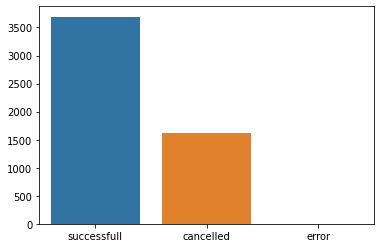

In [35]:
sns.barplot(x=trans_vc.index, y=trans_vc.values)
# теперь нарисуем барплот, но скажем ему о том, что ось Х - должна 
# представлять индекс из нашего датафрейма, а Y - это само значение из датафрейма

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

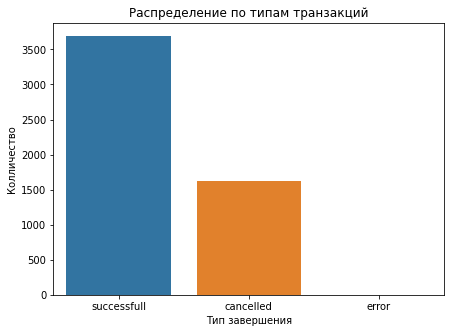

In [37]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=trans_vc.index, y=trans_vc.values, ax=ax)
ax.set_ylabel('Колличество')
ax.set_xlabel('Тип завершения')
ax.set_title("Распределение по типам транзакций")
ax.bar_label(ax.containers[0])
# здесь мы можем улучшить картинку нашего барплота, задав ему значение по размеру
# передав в значение figsize размеры
# subplots возвращает два обЪекта - это некоторый объект фигуры - fig и объект оси - ax
# Далее построим барплот куда так же передадим trans_vc в X - как индекс, а в Y - как значение датафрейма
# далее мы предадим нашему графику эстетичный вид с помощью обозначения подписей, где
# скажем что по ax. y - мы хотим видеть надпись колличество
# по ax Х - мы хотим видеть надпись Тип завершения
# и добавим титульник Распределение по типам транзакций
# так же в более совершенной версии питон мы с помощью bar_label 
# можем добавить подписи к нашим столбцам, что бы видеть колличество именно в нашем случае

                                             _________________________
                                             Сколько произошло ошибок? 
                                             _________________________

In [41]:
trans_vc['error']
# Просто посмотрите в результат, полученный ранее с помощью value_counts

4

                                        ______________________________________________________
                                        Сколько транзакций осуществил каждый из пользователей?
                                    Осуществлёнными считаются транзакции со значением successfull

                                            Посмотрите на характеристики распределения, 
                                     а затем постройте гистограмму числа успешных транзакций, 
                                              совершённых каждым пользователем, где

                                                    по оси x – число транзакций
                                      по оси y – доля пользователей с таким числом транзакций
                                        _______________________________________________________

In [49]:
success_per_user = data.loc[data.transaction == 'successfull'].groupby('name', as_index=False).size()
# первым делом отфильтруем данные по типу транзакции,
# зададим новую переменную success_per_user куда передадим датафрейм и обозначим фильтрацию
# при помощи .loc куда в квадратных скобках передадим датафрейм.колонка должна ровняться == successfull
# тоесть будут отбираться значения только равные successful
# после чего сгруппируем .groupby по имени 'name', а дальше поставим as_index=False что бы не индексировать колонку
# и в конце вызовем метод .size() который посчитает колличество строк для каждого из имён


In [50]:
success_per_user.head()
# посмотрим на финальный результат после прошлой операции через метод .head()
# который отберёт 5 записей

,name,size
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


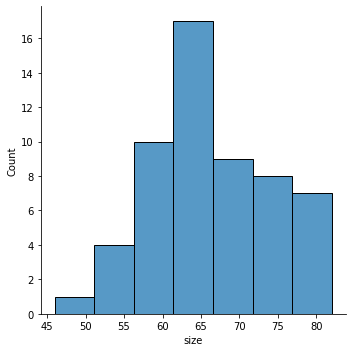

In [52]:
sns.displot(data=success_per_user, x='size')
# построим фигуру displot в которую передадим
# data = наша прошлая переменная, а так же ось X - колонка size
# по которой будет строиться график

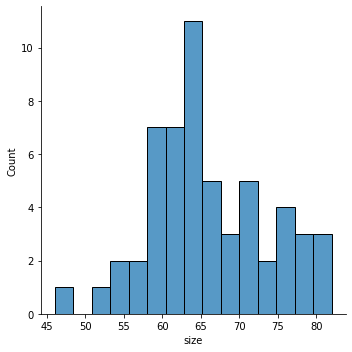

In [45]:
sns.displot(data=success_per_user, x='size', bins=15)

In [54]:
success_per_user.describe()
# для просмотра данных мы можем вызвать метод .describe
# который покажет, высокое, среднее, минимальное значение
# а так же значения в процентилях

,size
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


                                              ____________________________________
                                    Постройте сводную таблицу user_vs_minute_pivot, где:

                                             столбцы – имена пользователей
                                    строки – минута времени осуществления операции (minute)
                                          значения – число совершённых операций
                                          Пропущенные значения заполните нулями.

                          Note: фильтровать успешные транзакции не нужно - постройте табличку по всем
                                             _______________________________________

In [64]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-dolgih/1transaction_data_updated.csv', parse_dates=['date'])
# Прочитаем для нового задания новый датафрейм
# при том считаем нащи данные из колонки date как дату и время через функцию parse_dates
# куда и передадим колонку date

In [65]:
df.head()
# посмотрим на последние 5 результатов 

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [66]:
df.dtypes
# узнаем типы колонок нашего датафрейма (колонку со временем уже изменили)

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [69]:
trans_per_minute = df.groupby(['name', 'minute'], as_index=False).size()
# сначала сгрупируем наш датафрейм по колонке name и по колонке minute
# указав то, что индексировать их не нужно as_index = False
# и вызовем метод .size() который посчитает нам колличество строк с содержанием
# колонок name и minutes


In [70]:
trans_per_minute.head()
# посмотрим на 5 последних результатов
# где увидим что екатерина фёдорова сделала в нулевую минуту 3 транзакции
# а в первую минуту сделала четыре транзакции

,name,minute,size
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


In [72]:
pivot_trans_per_min = trans_per_minute.pivot(index='minute', columns='name', values='size')
# дальше попробуем использовать сводные таблицы
# при помощи метода pivot у нашего датафрейма, создадим сводную таблицу, 
# где индексом (слева в колонке) станет номер минут, колонками станут пользователи 'name'
# а значениями окажется колонка 'size' 
# тем самым сейчас мы ни чего не изменим в таблице, но за то поменяем её конфигурацию


In [74]:
pivot_trans_per_min.head()
# выглядеть после изменений таблица будет вот так
# индексами стали минуты, а колонками стали наши имена, 


name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0


In [77]:
pivot_trans_per_min = pivot_trans_per_min.fillna(0)
# при этом в задании наб необходимо заполнить пропуски (NaN) только нулями (0)
# по этому мы применим метод fillna(0) который заполняет пропуски

In [78]:
pivot_trans_per_min.head()
# посмотрим на результат

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [81]:
pivot_trans_per_min = pivot_trans_per_min.fillna(0)
# При том в задании говорится, что нам нужно заменить все значения (NaN) но (0)
# в этом нам поможет метод fillna который заменяет отсутствующие значения на 0

In [82]:
pivot_trans_per_min.head()
# посмотрим на результат замены ячеек на 0

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


                                     _______________________________________________________
                                     Коллега построил следующий график по сводной таблице из
                                     предыдущего шага, и сомневается, что в данных нет ошибки. 

                                  по оси x – минута транзакции (сколько минут прошло с начала дня)
                                                   по оси y – число транзакций
                                     ________________________________________________________   

In [85]:
# построим график как у коллеги

In [86]:
minute_trans = pivot_trans_per_min.sum(axis=1)

In [87]:
minute_trans.head()

minute
0    111.0
1    145.0
2    123.0
3    129.0
4     92.0
dtype: float64

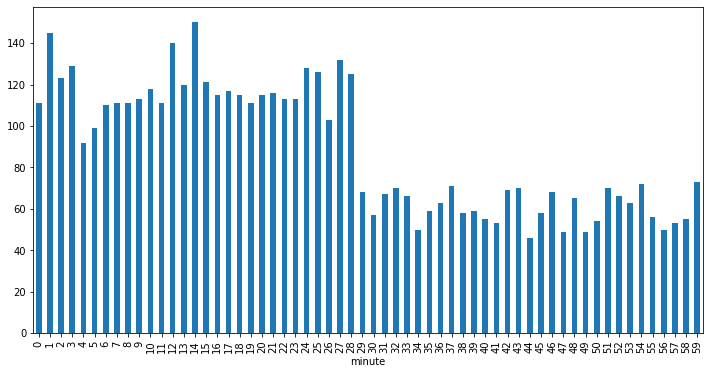

In [91]:
minute_trans.plot.bar(figsize=(12,6))

In [90]:
df.date.describe(datetime_is_numeric=True)

count                             5315
mean     2020-03-02 00:43:56.628974592
min                2020-03-02 00:00:00
25%         2020-03-02 00:21:50.500000
50%                2020-03-02 00:43:26
75%         2020-03-02 01:06:22.500000
max                2020-03-02 01:29:05
Name: date, dtype: object

                                ______________________________________________________________________
                                Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, 
                                  прошедших с начала дня. Результат сохраните в колонку true_minute. 
                                      Постройте график, как в предыдущем шаге, и посмотрите, 
                                     произошли ли изменения (график в код включать не нужно).
                                     ____________________________________________________________

In [101]:
df['true_minute'] = df.date.dt.minute + df.date.dt.hour * 60
# Обратимся к датафрейму и создадим новую колонку под названием 'true_minute'
# где передадим значение датафрейм.колонка 
# минуты мы можем дастать из колонки с помощью атрибута dt - df.date.dt
# что бы достать время после полуночи, нам нужно сложить колличество минут
# и колличество часов переведённые в минуты
# часы мы можем достать анологично, только указав hour
# и для того, что бы перевести их в минуты, необходимо умножить их на 60

In [102]:
df.head()
# посмотрим результат

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


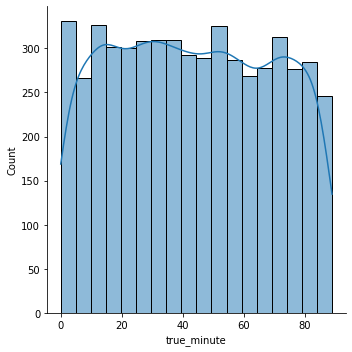

In [103]:
sns.displot(data=df, x='true_minute', kde=True)
# построим график дисплот
# где в data передадим наш датафрейм, и по оси x - укажем нашу новую колонку созданную
# в предыдущей ячейке true_minutes, так же укажем линию рисовки включённой kde=True